In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [25]:
albums_df = pd.read_csv("Albums.csv")
artists_df = pd.read_csv("Artists.csv")
songs_df = pd.read_csv("Songs.csv")

songs_df.drop("Notes", axis=1, inplace=True)

merged_df = songs_df.merge(albums_df, on='Album').merge(artists_df, on='Artist')
merged_df

,Date Listened,Playlist,Song Title,Album,Is New Song,Is Song Liked,Artist,Genre,Year of Release,State/Province,Country
0,3/30/2025,daylist,Arcarsenal,Relationship of Command,No,Yes,At The Drive-In,Post-Hardcore,2000,TX,US
1,3/30/2025,daylist,Cut Your Ribbon,Wiretap Scars,Yes,Yes,Sparta,Post-Hardcore,2002,TX,US
2,3/30/2025,daylist,Worms of the Senses- Faculties of the Skull,The Shape of Punk to Come,No,Yes,Refused,Post-Hardcore,1998,SE,SE
3,3/30/2025,daylist,Seven,Diary,No,Yes,Sunny Day Real Estate,Emo,1994,WA,US
4,3/30/2025,daylist,Inertiatic Esp,Deloused in the Comatorium,No,Yes,The Mars Volta,Prog Rock,2003,TX,US
...,...,...,...,...,...,...,...,...,...,...,...
131,3/28/2025,Ska Mix,Never Been Quite Like This,Rental!! Eviction!!,Yes,Yes,Bruce Lee band,Ska,2019,CA,US
132,3/28/2025,Ska Mix,A Jackknife to a Swan,A Jackknife to a Swan,No,Yes,The Mighty Mighty Bosstones,Ska-Punk,2002,MA,US
133,3/28/2025,Ska Mix,Good Riddance to Good Advice,Good Riddance to Good Advice,Yes,Yes,Kill Lincoln,Ska-Punk,2018,DC,US
134,3/28/2025,Ska Mix,Illusion of Choice,Illusion of Choice,No,Yes,The Best Of The Worst,Ska-Punk,2020,NJ,US


In [76]:
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

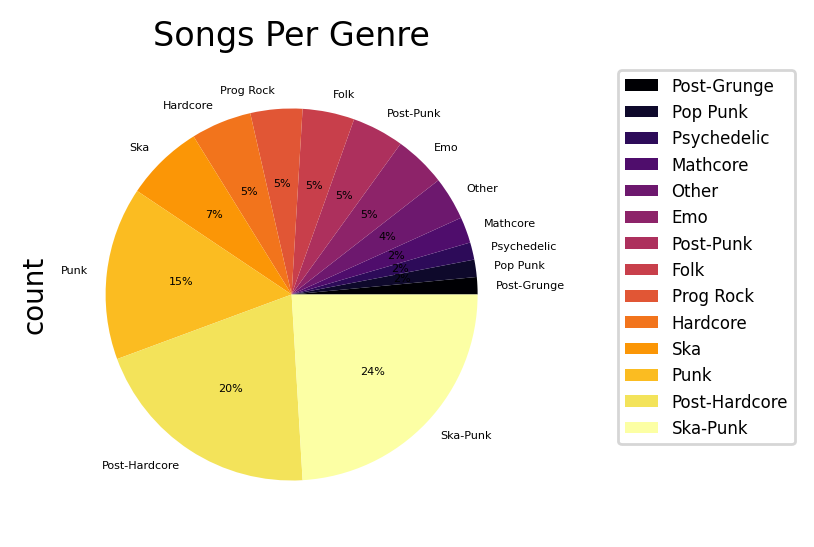

In [81]:
fig = plt.figure(figsize=(3,6), dpi=200)
ax = plt.subplot(111)

genre_counts = pd.DataFrame(merged_df["Genre"].value_counts()).reset_index()
genre_counts.loc[genre_counts['count'] < 2, 'Genre'] = 'Other'
genre_counts = genre_counts.groupby('Genre')['count'].sum().sort_values()

genre_counts.plot(kind='pie', y='count', cmap='inferno', legend=True, ax=ax, autopct='%1.0f%%', title='Songs Per Genre', fontsize='4').legend(bbox_to_anchor=(1.6, 1), fontsize='6')